In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pyflct
from astropy.io import fits

In [2]:
from matplotlib import font_manager

font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
Vx_conv3 = fits.open("pyFLCT_fwhm_600_dt_30_CONV3_tracked.fits")[0].data
Vy_conv3 = fits.open("pyFLCT_fwhm_600_dt_30_CONV3_tracked.fits")[1].data

In [4]:
Vx_conv3.shape

(66, 768, 768)

<h2>$\tau$ = 0.1</h2>

In [5]:
Vx = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [6]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [7]:
from scipy.ndimage import gaussian_filter

In [8]:
Vx.shape

(361, 1536, 1536)

In [9]:
Vx = Vx.reshape(361, 768, 2, 768, 2)
Vy = Vy.reshape(361, 768, 2, 768, 2)

In [10]:
Vx.shape

(361, 768, 2, 768, 2)

In [11]:
Vx_bin = Vx.mean(axis = 4).mean(axis = 2)
Vy_bin = Vy.mean(axis = 4).mean(axis = 2)

In [12]:
Vx_bin.shape

(361, 768, 768)

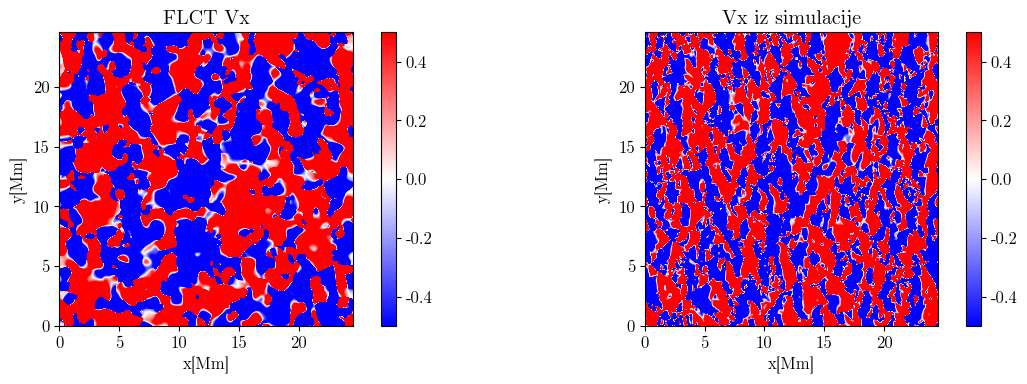

In [13]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv3[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv_cont.png", bbox_inches = 'tight', dpi = 100)

In [14]:
from scipy.stats import pearsonr

In [15]:
# Our next task is to to average velocities using previously defined function
# We shall use the first half of total slices for that
Vx_mean_sim = temporal_avg(Vx_bin, 0, 60)
Vx_mean_sim = Vx_mean_sim/1E5

Vy_mean_sim = temporal_avg(Vy_bin, 0, 60)
Vy_mean_sim = Vy_mean_sim/1E5

In [16]:
Vx_conv3_600 = temporal_avg(Vx_conv3, 0, 60)
Vy_conv3_600 = temporal_avg(Vy_conv3, 0, 60)

In [17]:
# sigma = 35
Vx_filtered22 = gaussian_filter(Vx_mean_sim, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim, 22.5, mode = "wrap")

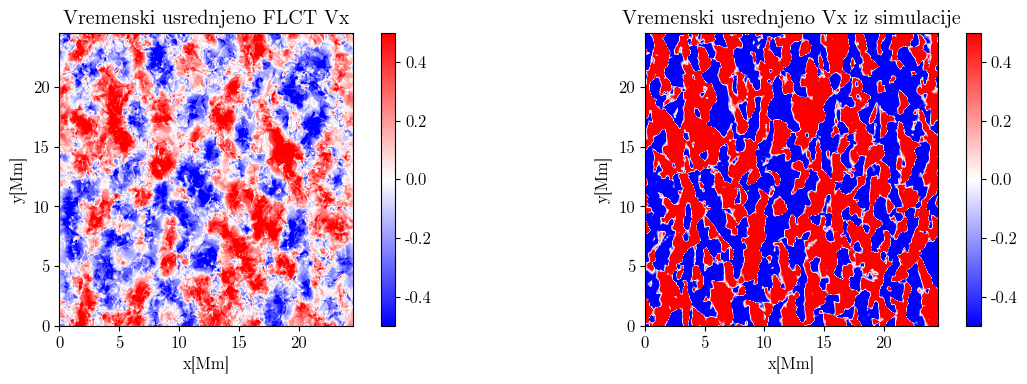

In [18]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv3_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv_cont.png", bbox_inches = 'tight', dpi = 100)

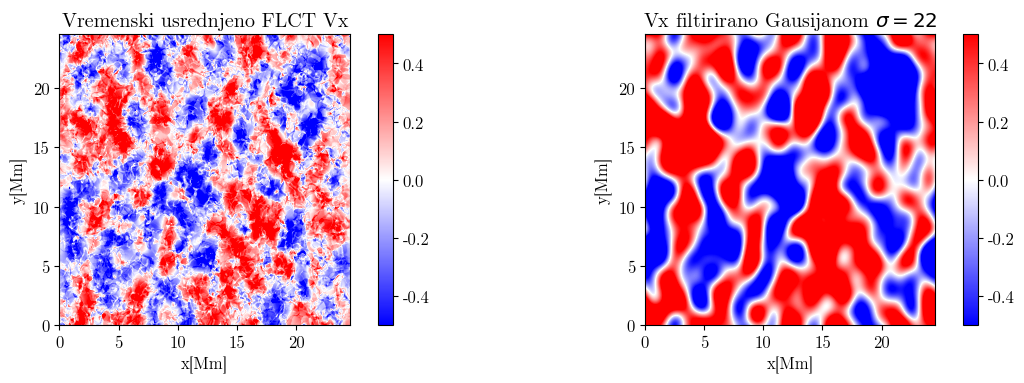

In [19]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv3_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv_cont.png", bbox_inches = 'tight', dpi = 100)

In [20]:
rx_conv3_1 = pearsonr(Vx_conv3[0].flatten(), (Vx_bin[0]/1E5).flatten()) 
print(rx_conv3_1)

PearsonRResult(statistic=0.221353339130647, pvalue=0.0)


In [21]:
rx_conv3_2 = pearsonr(Vx_conv3_600.flatten(), Vx_mean_sim.flatten()) 
print(rx_conv3_2)

PearsonRResult(statistic=0.4314883758289768, pvalue=0.0)


In [22]:
rx_conv3_3 = pearsonr(Vx_conv3_600.flatten(), Vx_filtered22.flatten()) 
print(rx_conv3_3)

PearsonRResult(statistic=0.6217708781751675, pvalue=0.0)


In [23]:
ry_conv3_1 = pearsonr(Vy_conv3[0].flatten(), (Vy_bin[0]/1E5).flatten()) 
print(ry_conv3_1)

PearsonRResult(statistic=0.1563269140823999, pvalue=0.0)


In [24]:
ry_conv3_2 = pearsonr(Vy_conv3_600.flatten(), Vy_mean_sim.flatten()) 
print(ry_conv3_2)

PearsonRResult(statistic=0.4122092278087439, pvalue=0.0)


In [25]:
ry_conv3_3 = pearsonr(Vy_conv3_600.flatten(), Vy_filtered22.flatten()) 
print(ry_conv3_3)

PearsonRResult(statistic=0.6101612739122979, pvalue=0.0)


<h2>Other end of the line</h2>

In [26]:
Vx_conv80 = fits.open("pyFLCT_fwhm_600_dt_30_CONV80_tracked.fits")[0].data
Vy_conv80 = fits.open("pyFLCT_fwhm_600_dt_30_CONV80_tracked.fits")[1].data

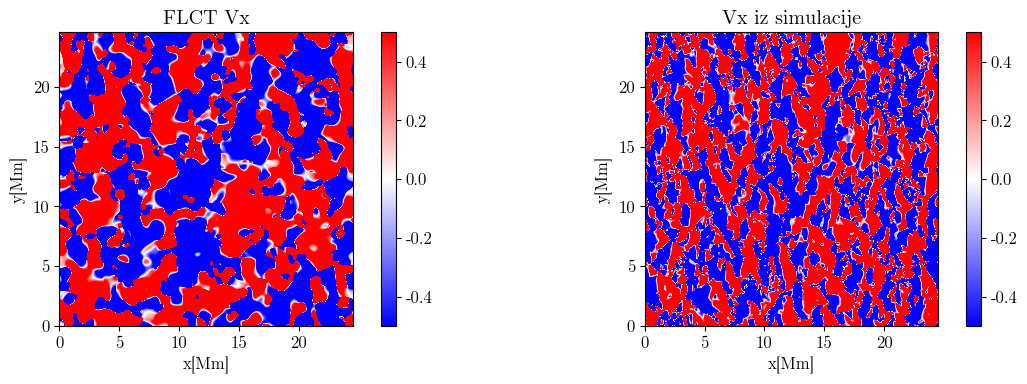

In [27]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv80_cont.png", bbox_inches = 'tight', dpi = 100)

In [28]:
Vx_conv80_600 = temporal_avg(Vx_conv80, 0, 60)
Vy_conv80_600 = temporal_avg(Vy_conv80, 0, 60)

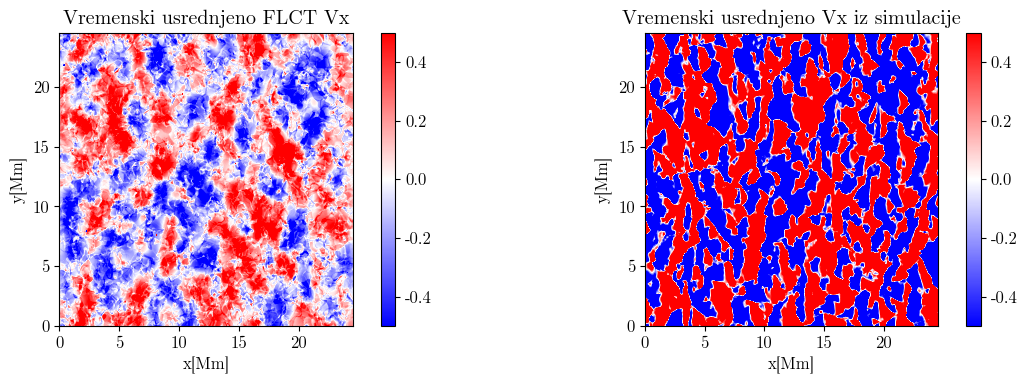

In [29]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv80_cont.png", bbox_inches = 'tight', dpi = 100)

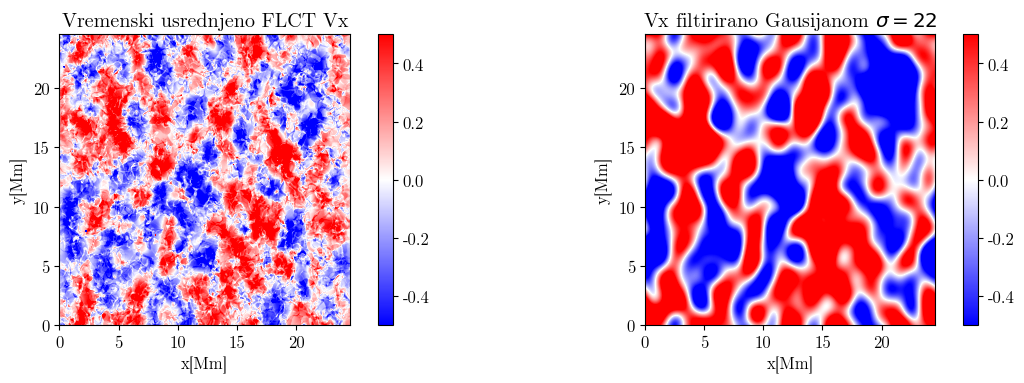

In [30]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv80_cont.png", bbox_inches = 'tight', dpi = 100)

In [31]:
rx_conv80_1 = pearsonr(Vx_conv80[0].flatten(), (Vx_bin[0]/1E5).flatten()) 
print(rx_conv80_1)

PearsonRResult(statistic=0.21349886202975057, pvalue=0.0)


In [32]:
rx_conv80_2 = pearsonr(Vx_conv80_600.flatten(), Vx_mean_sim.flatten()) 
print(rx_conv80_2)

PearsonRResult(statistic=0.4036741218811639, pvalue=0.0)


In [33]:
rx_conv80_3 = pearsonr(Vx_conv80_600.flatten(), Vx_filtered22.flatten()) 
print(rx_conv80_3)

PearsonRResult(statistic=0.5814324862848012, pvalue=0.0)


In [34]:
ry_conv80_1 = pearsonr(Vy_conv80[0].flatten(), (Vy_bin[0]/1E5).flatten()) 
print(ry_conv80_1)

PearsonRResult(statistic=0.14433810621337217, pvalue=0.0)


In [35]:
ry_conv80_2 = pearsonr(Vy_conv80_600.flatten(), Vy_mean_sim.flatten()) 
print(ry_conv80_2)

PearsonRResult(statistic=0.4059040439211192, pvalue=0.0)


In [36]:
ry_conv80_3 = pearsonr(Vy_conv80_600.flatten(), Vy_filtered22.flatten()) 
print(ry_conv80_3)

PearsonRResult(statistic=0.6013572031906959, pvalue=0.0)


<h2>Continuum vs $\tau$ = 1</h2>

In [37]:
Vx1 = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy1 = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx1 = Vx1.transpose(0, 2, 1)
Vy1 = Vy1.transpose(0, 2, 1)

In [38]:
Vx1 = Vx1.reshape(361, 768, 2, 768, 2)
Vy1 = Vy1.reshape(361, 768, 2, 768, 2)

In [39]:
Vx_bin1 = Vx1.mean(axis = 4).mean(axis = 2)
Vy_bin1 = Vy1.mean(axis = 4).mean(axis = 2)

In [40]:
Vx_mean_sim1 = temporal_avg(Vx_bin1, 0, 60)
Vx_mean_sim1 = Vx_mean_sim1/1E5

Vy_mean_sim1 = temporal_avg(Vy_bin1, 0, 60)
Vy_mean_sim1 = Vy_mean_sim1/1E5

In [41]:
Vx1_filtered22 = gaussian_filter(Vx_mean_sim1, 22.5, mode = "wrap")
Vy1_filtered22 = gaussian_filter(Vy_mean_sim1, 22.5, mode = "wrap")

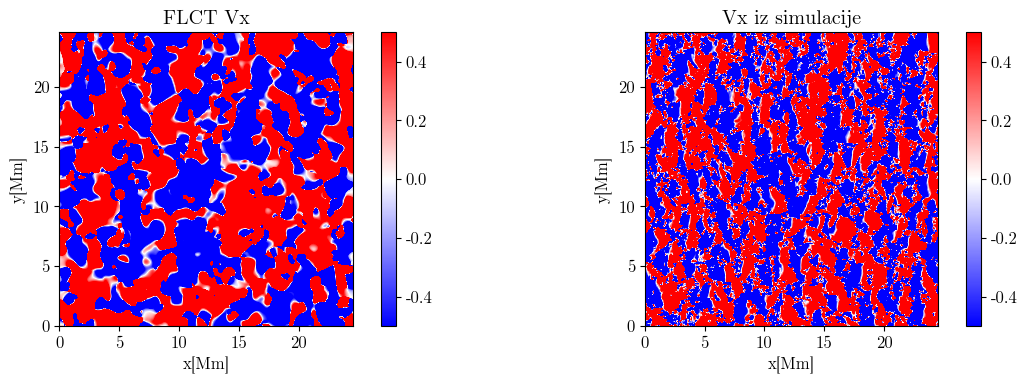

In [42]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin1[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno1_conv80_cont.png", bbox_inches = 'tight', dpi = 100)

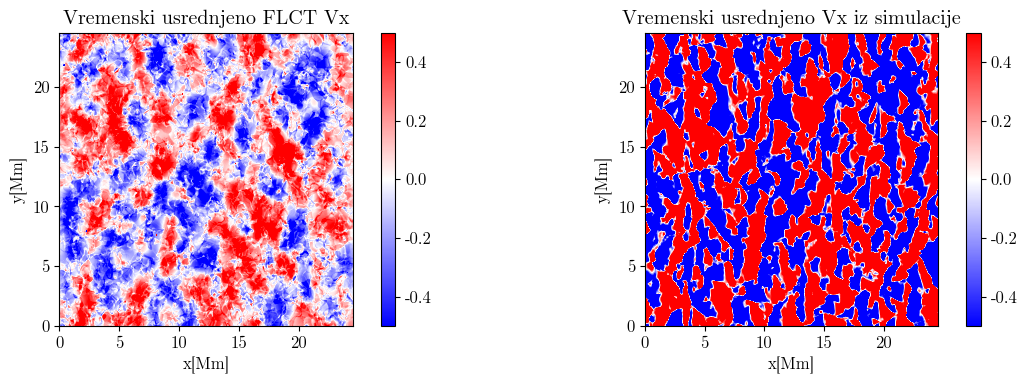

In [43]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time1_conv80_cont.png", bbox_inches = 'tight', dpi = 100)

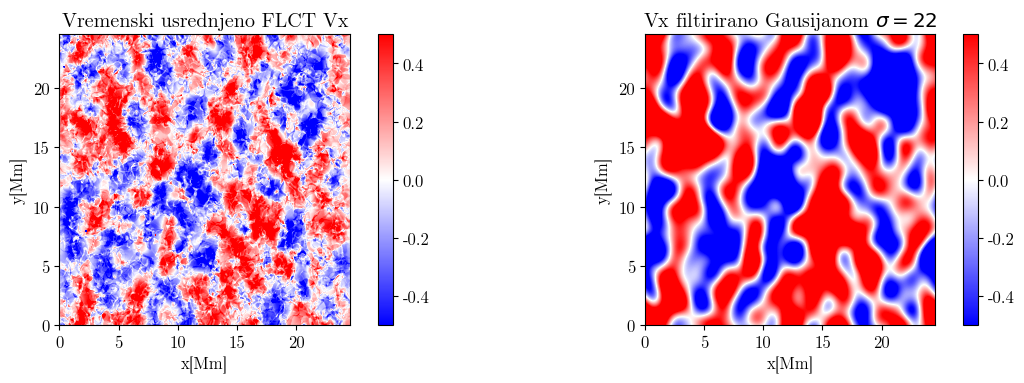

In [44]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx1_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin1_conv80_cont.png", bbox_inches = 'tight', dpi = 100)

In [45]:
rx1_conv80_1 = pearsonr(Vx_conv80[0].flatten(), (Vx_bin1[0]/1E5).flatten()) 
print(rx1_conv80_1)

PearsonRResult(statistic=0.18982524249595928, pvalue=0.0)


In [46]:
rx1_conv80_2 = pearsonr(Vx_conv80_600.flatten(), Vx_mean_sim1.flatten()) 
print(rx1_conv80_2)

PearsonRResult(statistic=0.45454242764962305, pvalue=0.0)


In [47]:
rx1_conv80_3 = pearsonr(Vx_conv80_600.flatten(), Vx1_filtered22.flatten()) 
print(rx1_conv80_3)

PearsonRResult(statistic=0.6056008814915617, pvalue=0.0)


In [48]:
ry1_conv80_1 = pearsonr(Vy_conv80[0].flatten(), (Vy_bin1[0]/1E5).flatten()) 
print(ry1_conv80_1)

PearsonRResult(statistic=0.13490339108295926, pvalue=0.0)


In [49]:
ry1_conv80_2 = pearsonr(Vy_conv80_600.flatten(), Vy_mean_sim1.flatten()) 
print(ry1_conv80_2)

PearsonRResult(statistic=0.47789006470956147, pvalue=0.0)


In [50]:
ry1_conv80_3 = pearsonr(Vy_conv80_600.flatten(), Vy1_filtered22.flatten()) 
print(ry1_conv80_3)

PearsonRResult(statistic=0.6742517348693424, pvalue=0.0)


<h2>Wing vs $\tau$ = 0.1</h2>

In [51]:
Vx_conv50 = fits.open("pyFLCT_fwhm_600_dt_30_CONV50_tracked.fits")[0].data
Vy_conv50 = fits.open("pyFLCT_fwhm_600_dt_30_CONV50_tracked.fits")[1].data

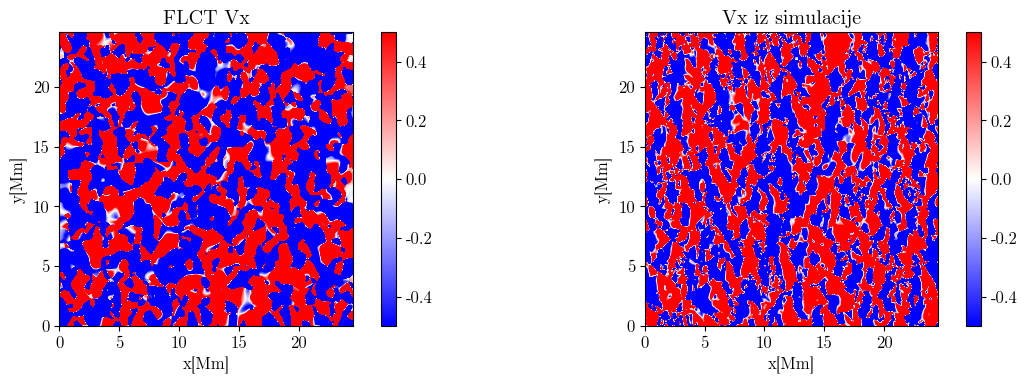

In [52]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv50[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv50_cont.png", bbox_inches = 'tight', dpi = 100)

In [53]:
Vx_conv50_600 = temporal_avg(Vx_conv50, 0, 60)
Vy_conv50_600 = temporal_avg(Vy_conv50, 0, 60)

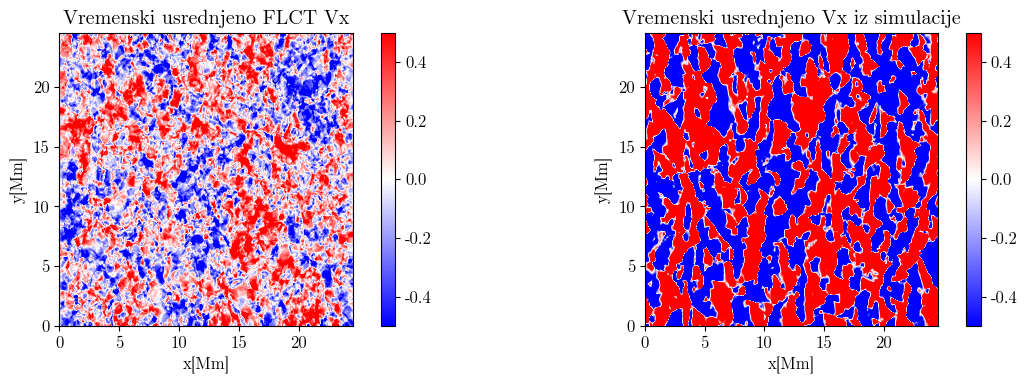

In [54]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv50_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv50_cont.png", bbox_inches = 'tight', dpi = 100)

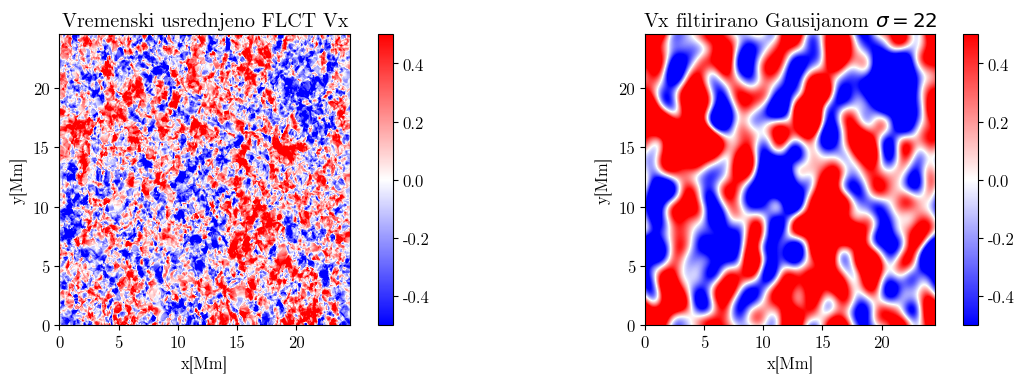

In [55]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv50_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx1_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin1_conv50_cont.png", bbox_inches = 'tight', dpi = 100)

In [56]:
rx_conv50_1 = pearsonr(Vx_conv50[0].flatten(), (Vx_bin[0]/1E5).flatten()) 
print(rx_conv50_1)

PearsonRResult(statistic=0.006461412555536324, pvalue=6.962522162868676e-07)


In [57]:
rx_conv50_2 = pearsonr(Vx_conv50_600.flatten(), Vx_mean_sim.flatten()) 
print(rx_conv50_2)

PearsonRResult(statistic=0.13584367178350232, pvalue=0.0)


In [58]:
rx_conv50_3 = pearsonr(Vx_conv50_600.flatten(), Vx_filtered22.flatten()) 
print(rx_conv50_3)

PearsonRResult(statistic=0.2516772527448767, pvalue=0.0)


In [59]:
ry_conv50_1 = pearsonr(Vy_conv50[0].flatten(), (Vy_bin[0]/1E5).flatten()) 
print(ry_conv50_1)

PearsonRResult(statistic=-0.0031767865034488287, pvalue=0.014696492741462855)


In [60]:
ry_conv50_2 = pearsonr(Vy_conv50_600.flatten(), Vy_mean_sim.flatten()) 
print(ry_conv50_2)

PearsonRResult(statistic=0.1444087325864018, pvalue=0.0)


In [61]:
ry_conv50_3 = pearsonr(Vy_conv50_600.flatten(), Vy_filtered22.flatten()) 
print(ry_conv50_3)

PearsonRResult(statistic=0.2741018184698586, pvalue=0.0)


<h2>Centre vs $\tau$ = 0.1</h2>

In [62]:
Vx_conv45 = fits.open("pyFLCT_fwhm_600_dt_30_CONV45_tracked.fits")[0].data
Vy_conv45 = fits.open("pyFLCT_fwhm_600_dt_30_CONV45_tracked.fits")[1].data

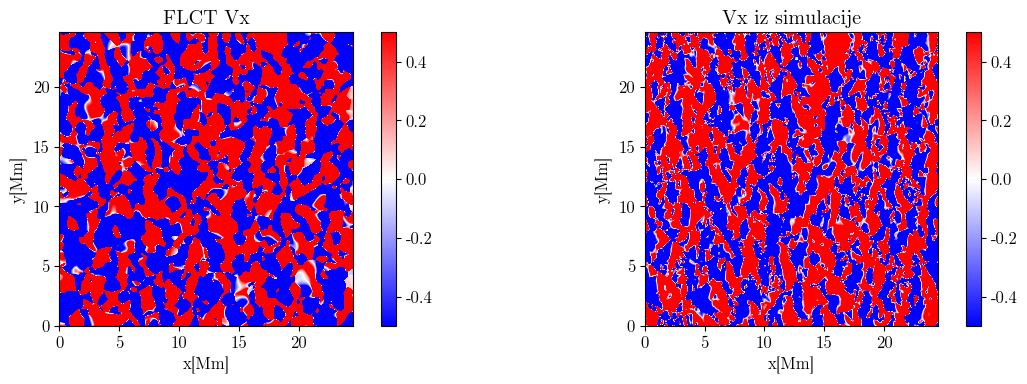

In [63]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv45_cont.png", bbox_inches = 'tight', dpi = 100)

In [64]:
Vx_conv45_600 = temporal_avg(Vx_conv45, 0, 60)
Vy_conv45_600 = temporal_avg(Vy_conv45, 0, 60)

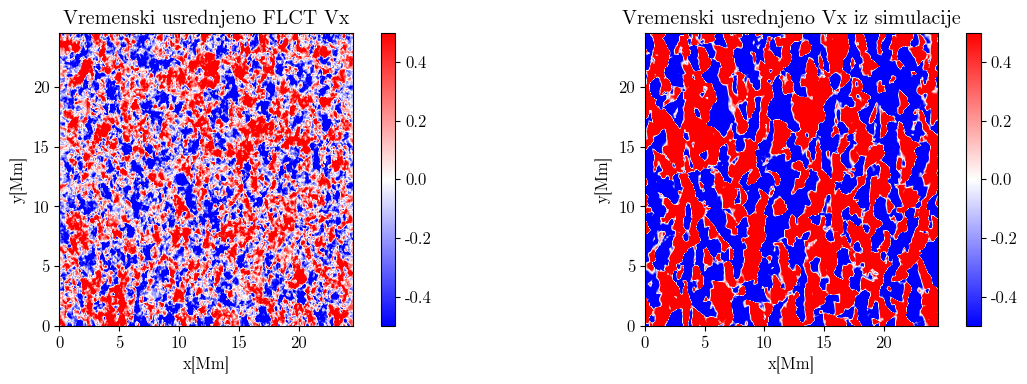

In [65]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv45_cont.png", bbox_inches = 'tight', dpi = 100)

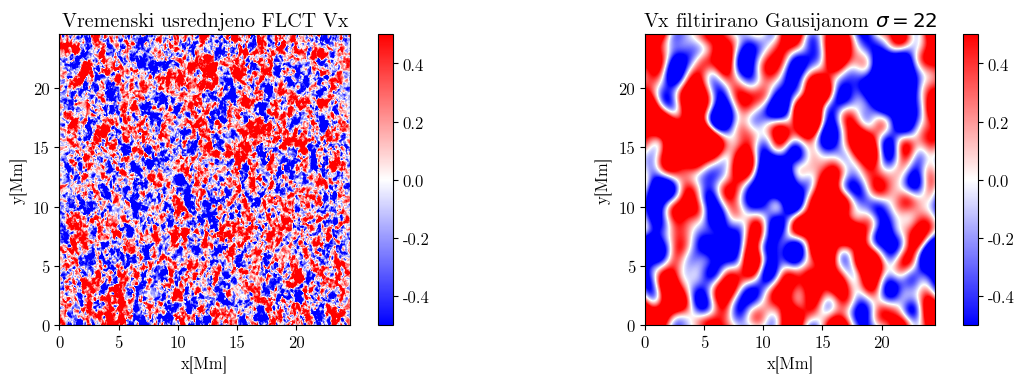

In [66]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx1_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin1_conv45_cont.png", bbox_inches = 'tight', dpi = 100)

In [67]:
rx_conv45_1 = pearsonr(Vx_conv45[0].flatten(), (Vx_bin[0]/1E5).flatten()) 
print(rx_conv45_1)

PearsonRResult(statistic=0.049338346399038946, pvalue=1.46461031e-314)


In [68]:
rx_conv45_2 = pearsonr(Vx_conv45_600.flatten(), Vx_mean_sim.flatten()) 
print(rx_conv45_2)

PearsonRResult(statistic=-0.09239389679376436, pvalue=0.0)


In [69]:
rx_conv45_3 = pearsonr(Vx_conv45_600.flatten(), Vx_filtered22.flatten()) 
print(rx_conv45_3)

PearsonRResult(statistic=-0.036321733166139, pvalue=2.370093568753215e-171)


In [70]:
ry_conv45_1 = pearsonr(Vy_conv45[0].flatten(), (Vy_bin[0]/1E5).flatten()) 
print(ry_conv45_1)

PearsonRResult(statistic=0.06563134317643321, pvalue=0.0)


In [71]:
ry_conv45_2 = pearsonr(Vy_conv45_600.flatten(), Vy_mean_sim.flatten()) 
print(ry_conv45_2)

PearsonRResult(statistic=-0.06629155575470083, pvalue=0.0)


In [72]:
ry_conv45_3 = pearsonr(Vy_conv45_600.flatten(), Vy_filtered22.flatten()) 
print(ry_conv45_3)

PearsonRResult(statistic=-0.011413824818301754, pvalue=1.8498737474275706e-18)


<h3>vs $\tau$ = 1</h3>

In [73]:
rx1_conv45_1 = pearsonr(Vx_conv45[0].flatten(), (Vx_bin1[0]/1E5).flatten()) 
print(rx1_conv45_1)

PearsonRResult(statistic=0.03142868264685152, pvalue=8.81411311428774e-129)


In [74]:
rx1_conv45_2 = pearsonr(Vx_conv45_600.flatten(), Vx_mean_sim1.flatten()) 
print(rx1_conv45_2)

PearsonRResult(statistic=-0.08642947010076184, pvalue=0.0)


In [75]:
rx1_conv45_3 = pearsonr(Vx_conv45_600.flatten(), Vx1_filtered22.flatten()) 
print(rx1_conv45_3)

PearsonRResult(statistic=-0.03211918023239195, pvalue=2.0420414957316474e-134)


In [76]:
ry1_conv45_1 = pearsonr(Vy_conv45[0].flatten(), (Vy_bin1[0]/1E5).flatten()) 
print(ry1_conv45_1)

PearsonRResult(statistic=0.012168107071715601, pvalue=9.151479269819947e-21)


In [77]:
ry1_conv45_2 = pearsonr(Vy_conv45_600.flatten(), Vy_mean_sim1.flatten()) 
print(ry1_conv45_2)

PearsonRResult(statistic=-0.04671293560912422, pvalue=3.648912097442593e-282)


In [78]:
ry1_conv45_3 = pearsonr(Vy_conv45_600.flatten(), Vy1_filtered22.flatten()) 
print(ry1_conv45_3)

PearsonRResult(statistic=-0.007434826897715006, pvalue=1.129669697776554e-08)


<h2>19. 8. 2024.</h2>
<h3>Line center vs $\tau$ = 0.01</h3>

In [79]:
Vx001 = fits.open("Velocities_TAU_0_01.fits")[1].data
Vy001 = fits.open("Velocities_TAU_0_01.fits")[0].data
Vx001 = Vx001.transpose(0, 2, 1)
Vy001 = Vy001.transpose(0, 2, 1)

In [80]:
Vx001 = Vx001.reshape(361, 768, 2, 768, 2)
Vy001 = Vy001.reshape(361, 768, 2, 768, 2)

In [81]:
Vx_bin001 = Vx001.mean(axis = 4).mean(axis = 2)
Vy_bin001 = Vy001.mean(axis = 4).mean(axis = 2)

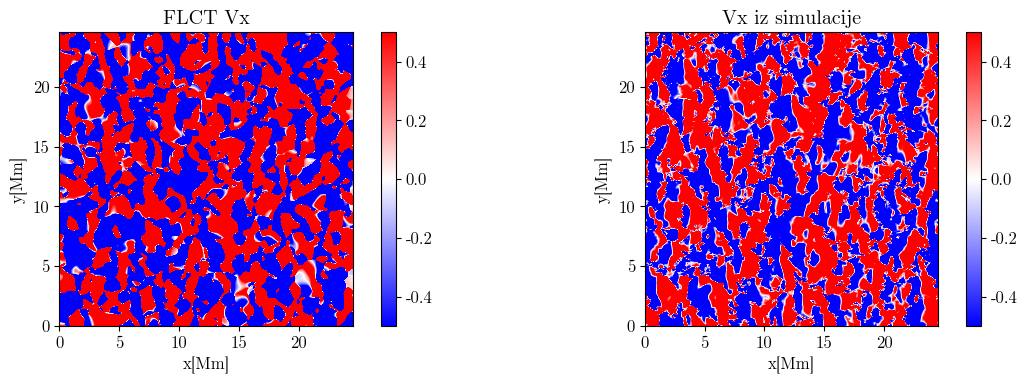

In [82]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin001[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv45_t001.png", bbox_inches = 'tight', dpi = 100)

In [83]:
Vx_mean_sim001 = temporal_avg(Vx_bin001, 0, 60)
Vx_mean_sim001 = Vx_mean_sim001/1E5

Vy_mean_sim001 = temporal_avg(Vy_bin001, 0, 60)
Vy_mean_sim001 = Vy_mean_sim001/1E5

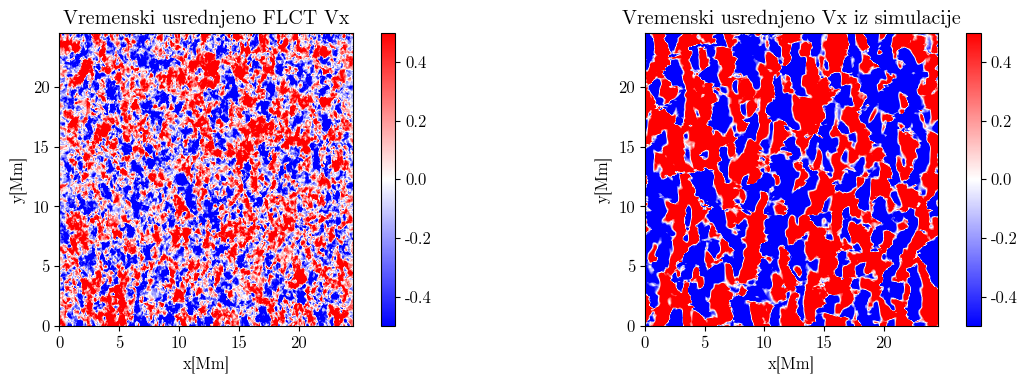

In [84]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim001[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv45_t001.png", bbox_inches = 'tight', dpi = 100)

In [85]:
Vx001_filtered22 = gaussian_filter(Vx_mean_sim001, 22.5, mode = "wrap")
Vy001_filtered22 = gaussian_filter(Vy_mean_sim001, 22.5, mode = "wrap")

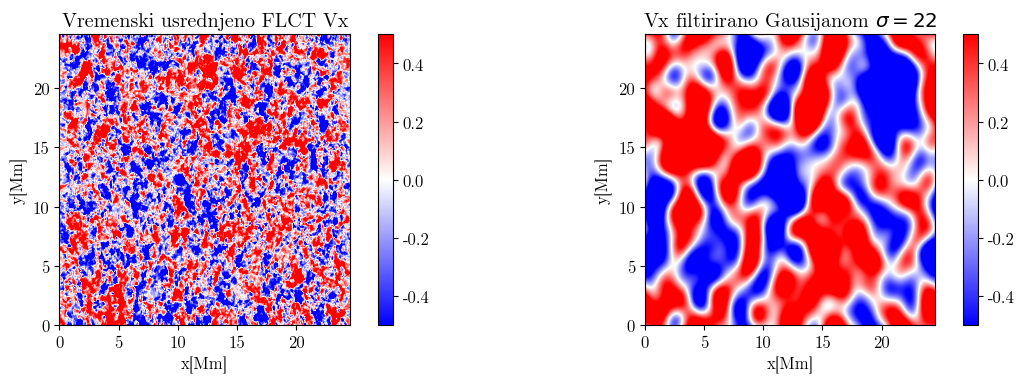

In [86]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx001_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv45_t001.png", bbox_inches = 'tight', dpi = 100)

In [87]:
rx001_conv45_1 = pearsonr(Vx_conv45[0].flatten(), (Vx_bin001[0]/1E5).flatten()) 
print(rx001_conv45_1)

PearsonRResult(statistic=0.03908777143824327, pvalue=3.886981734576058e-198)


In [88]:
rx001_conv45_2 = pearsonr(Vx_conv45_600.flatten(), Vx_mean_sim001.flatten()) 
print(rx001_conv45_2)

PearsonRResult(statistic=-0.08564959648930212, pvalue=0.0)


In [89]:
rx001_conv45_3 = pearsonr(Vx_conv45_600.flatten(), Vx001_filtered22.flatten()) 
print(rx001_conv45_3)

PearsonRResult(statistic=-0.03732965620322251, pvalue=6.952096411927476e-181)


In [90]:
ry001_conv45_1 = pearsonr(Vy_conv45[0].flatten(), (Vy_bin001[0]/1E5).flatten()) 
print(ry001_conv45_1)

PearsonRResult(statistic=0.07434676706751911, pvalue=0.0)


In [91]:
ry001_conv45_2 = pearsonr(Vy_conv45_600.flatten(), Vy_mean_sim001.flatten()) 
print(ry001_conv45_2)

PearsonRResult(statistic=-0.07586315820673983, pvalue=0.0)


In [92]:
ry001_conv45_3 = pearsonr(Vy_conv45_600.flatten(), Vy001_filtered22.flatten()) 
print(ry001_conv45_3)

PearsonRResult(statistic=-0.02521647471121557, pvalue=1.4017392591673042e-83)


<h3>Line center vs $\tau$ = 0.001</h3>

In [93]:
Vx0001 = fits.open("Velocities_TAU_0_001.fits")[1].data
Vy0001 = fits.open("Velocities_TAU_0_001.fits")[0].data
Vx0001 = Vx0001.transpose(0, 2, 1)
Vy0001 = Vy0001.transpose(0, 2, 1)

In [94]:
Vx0001 = Vx0001.reshape(361, 768, 2, 768, 2)
Vy0001 = Vy0001.reshape(361, 768, 2, 768, 2)

In [95]:
Vx_bin0001 = Vx0001.mean(axis = 4).mean(axis = 2)
Vy_bin0001 = Vy0001.mean(axis = 4).mean(axis = 2)

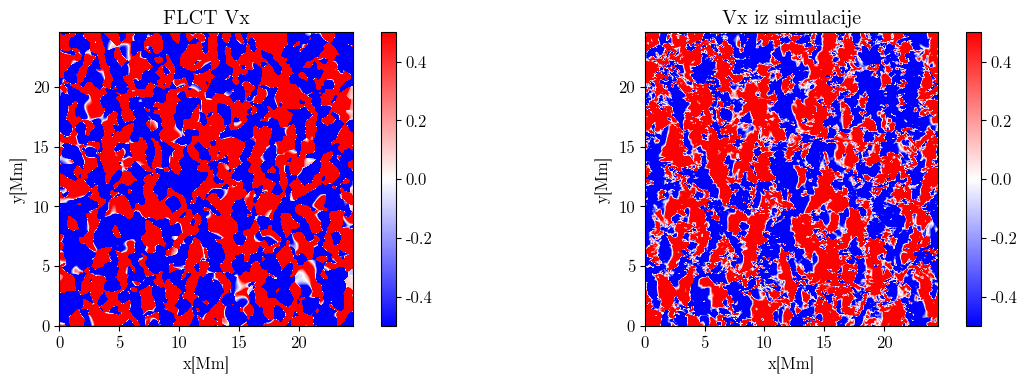

In [96]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin0001[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv45_t0001.png", bbox_inches = 'tight', dpi = 100)

In [97]:
Vx_mean_sim0001 = temporal_avg(Vx_bin0001, 0, 60)
Vx_mean_sim0001 = Vx_mean_sim0001/1E5

Vy_mean_sim0001 = temporal_avg(Vy_bin0001, 0, 60)
Vy_mean_sim0001 = Vy_mean_sim0001/1E5

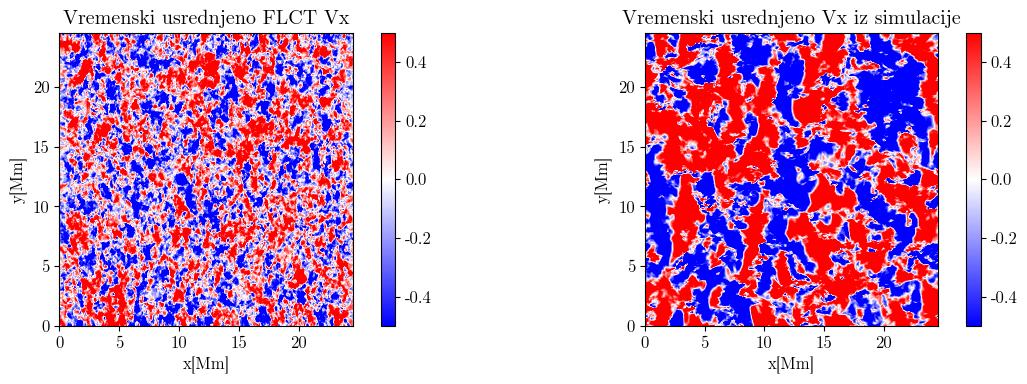

In [98]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim0001[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv45_t0001.png", bbox_inches = 'tight', dpi = 100)

In [99]:
Vx0001_filtered22 = gaussian_filter(Vx_mean_sim0001, 22.5, mode = "wrap")
Vy0001_filtered22 = gaussian_filter(Vy_mean_sim0001, 22.5, mode = "wrap")

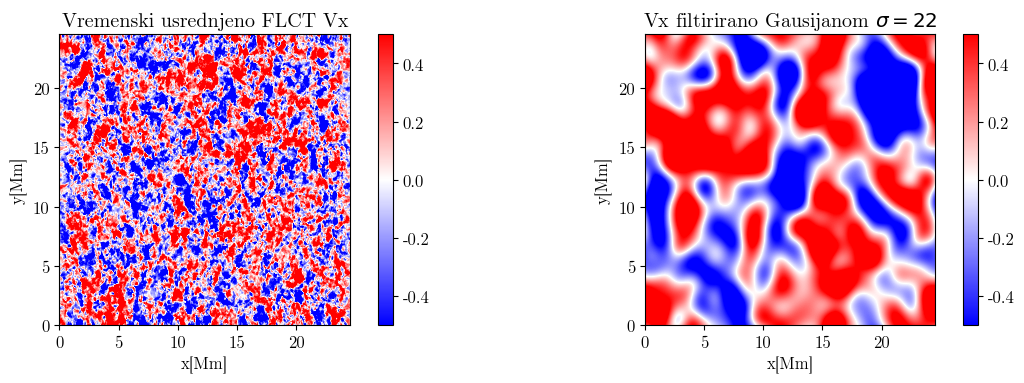

In [100]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv45_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx0001_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv45_t0001.png", bbox_inches = 'tight', dpi = 100)

In [101]:
rx0001_conv45_1 = pearsonr(Vx_conv45[0].flatten(), (Vx_bin0001[0]/1E5).flatten()) 
print(rx0001_conv45_1)

PearsonRResult(statistic=-0.0027782716124440266, pvalue=0.03286634728694439)


In [102]:
rx0001_conv45_2 = pearsonr(Vx_conv45_600.flatten(), Vx_mean_sim0001.flatten()) 
print(rx0001_conv45_2)

PearsonRResult(statistic=-0.04196877504752798, pvalue=3.9825007180808665e-228)


In [103]:
rx0001_conv45_3 = pearsonr(Vx_conv45_600.flatten(), Vx0001_filtered22.flatten()) 
print(rx0001_conv45_3)

PearsonRResult(statistic=-0.008205749640049378, pvalue=2.936235777388996e-10)


In [104]:
ry0001_conv45_1 = pearsonr(Vy_conv45[0].flatten(), (Vy_bin0001[0]/1E5).flatten()) 
print(ry0001_conv45_1)

PearsonRResult(statistic=0.02826675931534682, pvalue=1.540792569158662e-104)


In [105]:
ry0001_conv45_2 = pearsonr(Vy_conv45_600.flatten(), Vy_mean_sim0001.flatten()) 
print(ry0001_conv45_2)

PearsonRResult(statistic=-0.064366926766282, pvalue=0.0)


In [106]:
ry0001_conv45_3 = pearsonr(Vy_conv45_600.flatten(), Vy0001_filtered22.flatten()) 
print(ry0001_conv45_3)

PearsonRResult(statistic=-0.02757773674383922, pvalue=1.3504242193442097e-99)


In [107]:
Vx_conv8012 = fits.open("pyFLCT_fwhm_1200_dt_30_CONV80_tracked.fits")[0].data
Vy_conv8012 = fits.open("pyFLCT_fwhm_1200_dt_30_CONV80_tracked.fits")[1].data

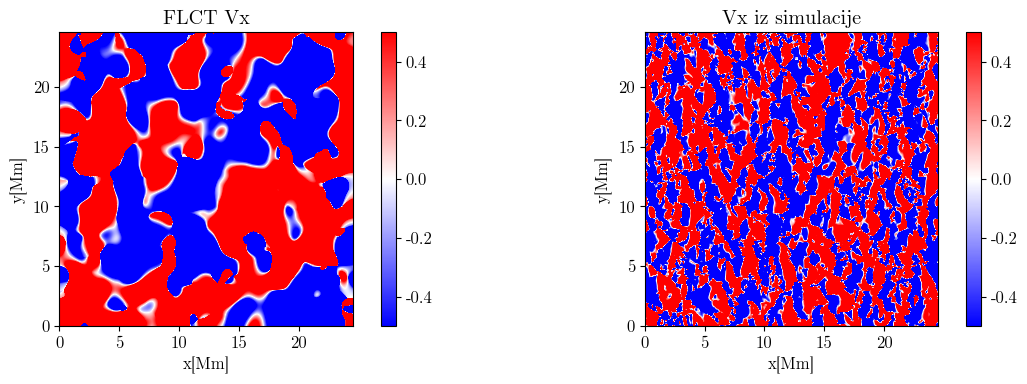

In [108]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv8012[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv80_1200.png", bbox_inches = 'tight', dpi = 100)

In [109]:
Vx_conv80_1200 = temporal_avg(Vx_conv8012, 0, 60)
Vy_conv80_1200 = temporal_avg(Vy_conv8012, 0, 60)

In [110]:
Vx_filtered35 = gaussian_filter(Vx_mean_sim, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_mean_sim, 35, mode = "wrap")

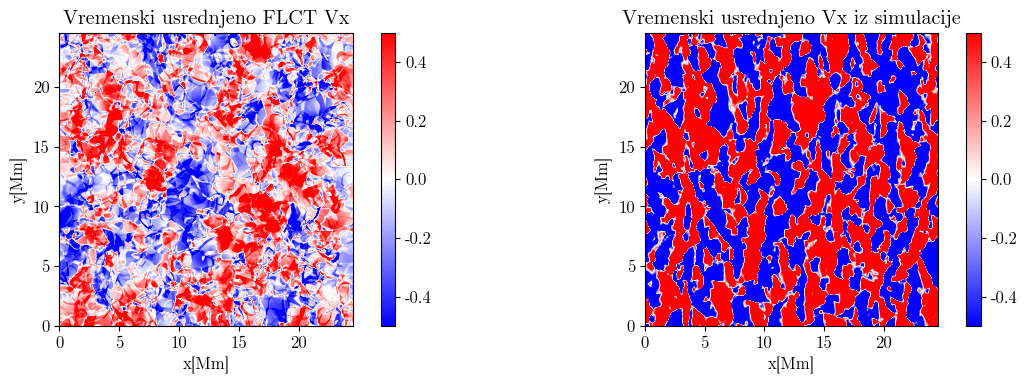

In [111]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80_1200[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv80_1200.png", bbox_inches = 'tight', dpi = 100)

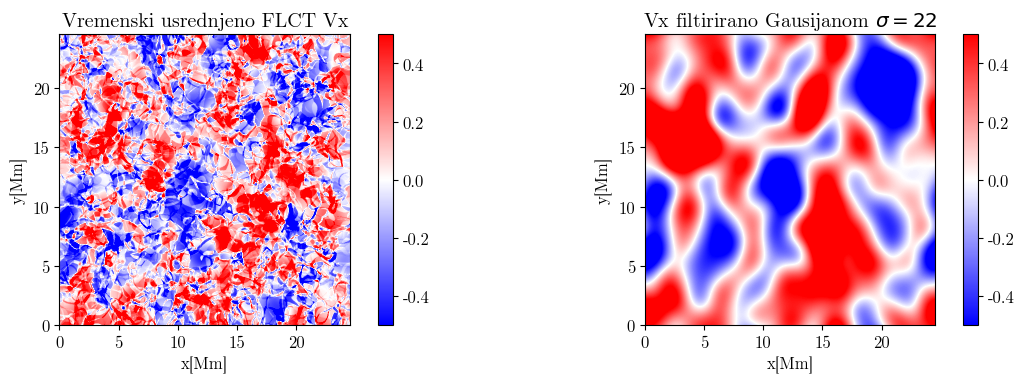

In [112]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv80_1200[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv80_1200.png", bbox_inches = 'tight', dpi = 100)

In [113]:
rx12_conv80_1 = pearsonr(Vx_conv80[0].flatten(), (Vx_bin[0]/1E5).flatten()) 
print(rx12_conv80_1)

PearsonRResult(statistic=0.21349886202975057, pvalue=0.0)


In [114]:
rx12_conv80_2 = pearsonr(Vx_conv80_1200.flatten(), Vx_mean_sim.flatten()) 
print(rx12_conv80_2)

PearsonRResult(statistic=0.2338672957728449, pvalue=0.0)


In [115]:
rx12_conv80_3 = pearsonr(Vx_conv80_1200.flatten(), Vx_filtered35.flatten()) 
print(rx12_conv80_3)

PearsonRResult(statistic=0.3829215782271632, pvalue=0.0)


In [116]:
ry12_conv80_1 = pearsonr(Vy_conv80[0].flatten(), (Vy_bin[0]/1E5).flatten()) 
print(ry12_conv80_1)

PearsonRResult(statistic=0.14433810621337217, pvalue=0.0)


In [117]:
ry12_conv80_2 = pearsonr(Vy_conv80_1200.flatten(), Vy_mean_sim.flatten()) 
print(ry12_conv80_2)

PearsonRResult(statistic=0.2247986421877105, pvalue=0.0)


In [118]:
ry12_conv80_3 = pearsonr(Vy_conv80_1200.flatten(), Vy_filtered35.flatten()) 
print(ry12_conv80_3)

PearsonRResult(statistic=0.3982804058887088, pvalue=0.0)


In [119]:
cube1 = fits.open("0_lwsynth_525.0.fits")[0].data

In [120]:
cube1.shape

(768, 768, 1, 81)

In [121]:
print(cube1[1,1,0,:])

[2.92016152e-08 2.92001980e-08 2.91986715e-08 2.91970244e-08
 2.91952436e-08 2.91933141e-08 2.91912186e-08 2.91889374e-08
 2.91864477e-08 2.91837230e-08 2.91807318e-08 2.91774366e-08
 2.91737912e-08 2.91697369e-08 2.91651971e-08 2.91600712e-08
 2.91542314e-08 2.91475247e-08 2.91397779e-08 2.91307985e-08
 2.91203539e-08 2.91081172e-08 2.90935475e-08 2.90757298e-08
 2.90528370e-08 2.90212625e-08 2.89739890e-08 2.88982535e-08
 2.87732248e-08 2.85694912e-08 2.82532961e-08 2.77968528e-08
 2.71931914e-08 2.64579923e-08 2.56118481e-08 2.46405031e-08
 2.34451020e-08 2.18067536e-08 1.94365208e-08 1.62382293e-08
 1.26742707e-08 9.64139825e-09 7.65485251e-09 6.53398207e-09
 5.90531354e-09 5.54161583e-09 5.34733963e-09 5.29992037e-09
 5.43441352e-09 5.86058784e-09 6.80343150e-09 8.63478090e-09
 1.16495580e-08 1.55054486e-08 1.92865508e-08 2.23456107e-08
 2.46059986e-08 2.62297197e-08 2.73677313e-08 2.81201205e-08
 2.85760705e-08 2.88273492e-08 2.89558165e-08 2.90203885e-08
 2.90555378e-08 2.907800

In [122]:
print(cube1[1,1,0,45])

5.54161582680613e-09


In [123]:
print(cube1[1,1,0,50])

6.803431497250509e-09


In [124]:
print(cube1[1,1,0,3])

2.919702442009992e-08


In [125]:
print(cube1[1,1,0,25])

2.9021262470061357e-08


In [126]:
print(cube1[1,1,0,40])

1.2674270729352157e-08


In [127]:
cube55 = fits.open("0_lwsynth_525.0_convolved.fits")[0].data

In [128]:
cube56 = fits.open("150_lwsynth_525.0_convolved.fits")[0].data

In [159]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 1200.0 / 1.665 / pixelsize

In [160]:
image1 = cube55[:,:,0,40]
image2 = cube56[:,:,0,40]

In [161]:
vel_x40, vel_y40, vm40 = pyflct.flct(image1, image2, delta_t, pixelsize, sigma, quiet = True)

In [162]:
# 2x2 Binning of Velocities
Vx_1 = Vx[0]
Vx_2 = Vx[1]

Vy_1 = Vy[0]
Vy_2 = Vy[1]

Vx_1 = Vx_1.reshape(768, 2, 768, 2)
Vx_2 = Vx_2.reshape(768, 2, 768, 2)
Vy_1 = Vy_1.reshape(768, 2, 768, 2)
Vy_2 = Vy_2.reshape(768, 2, 768, 2)

In [163]:
Vx_bin = (Vx_1 + Vx_2).mean(axis = 3).mean(axis = 1)
Vy_bin = (Vy_1 + Vy_2).mean(axis = 3).mean(axis = 1)

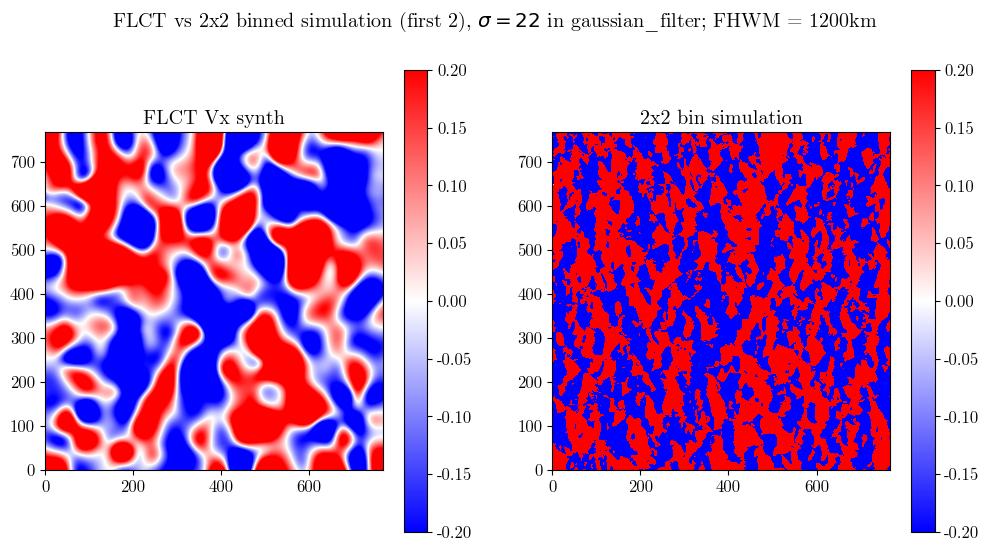

In [164]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 22$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation") 
fig.colorbar(im2)

In [165]:
# sigma = 35
Vxbin_filtered22 = gaussian_filter(Vx_bin, 22.5, mode = "wrap")
Vybin_filtered22 = gaussian_filter(Vy_bin, 22.5, mode = "wrap")

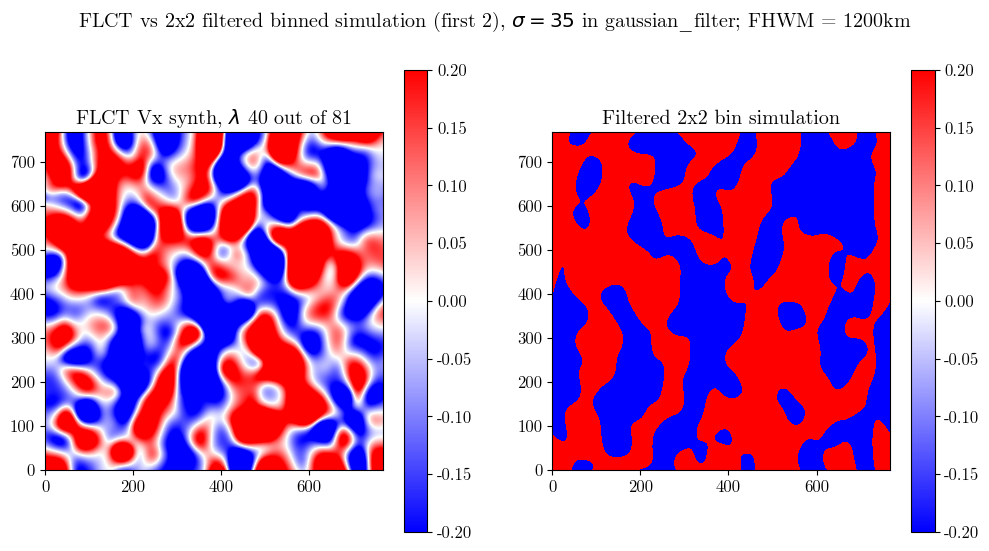

In [166]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 40 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxbin_filtered22[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
#plt.savefig("New40_TAU_0_1Vx.png", dpi = 600)

In [167]:
r_1 = pearsonr(vel_x40.flatten(), Vxbin_filtered22.flatten()) 
print(r_1)

PearsonRResult(statistic=0.6301942951462133, pvalue=0.0)


In [168]:
r_2 = pearsonr(vel_y40.flatten(), Vybin_filtered22.flatten()) 
print(r_2)

PearsonRResult(statistic=0.6038592256979347, pvalue=0.0)


In [169]:
Vx_1 = Vx1[0]
Vx_2 = Vx1[1]

Vy_1 = Vy1[0]
Vy_2 = Vy1[1]

Vx_1 = Vx_1.reshape(768, 2, 768, 2)
Vx_2 = Vx_2.reshape(768, 2, 768, 2)
Vy_1 = Vy_1.reshape(768, 2, 768, 2)
Vy_2 = Vy_2.reshape(768, 2, 768, 2)

In [170]:
Vx_bin = (Vx_1 + Vx_2).mean(axis = 3).mean(axis = 1)
Vy_bin = (Vy_1 + Vy_2).mean(axis = 3).mean(axis = 1)

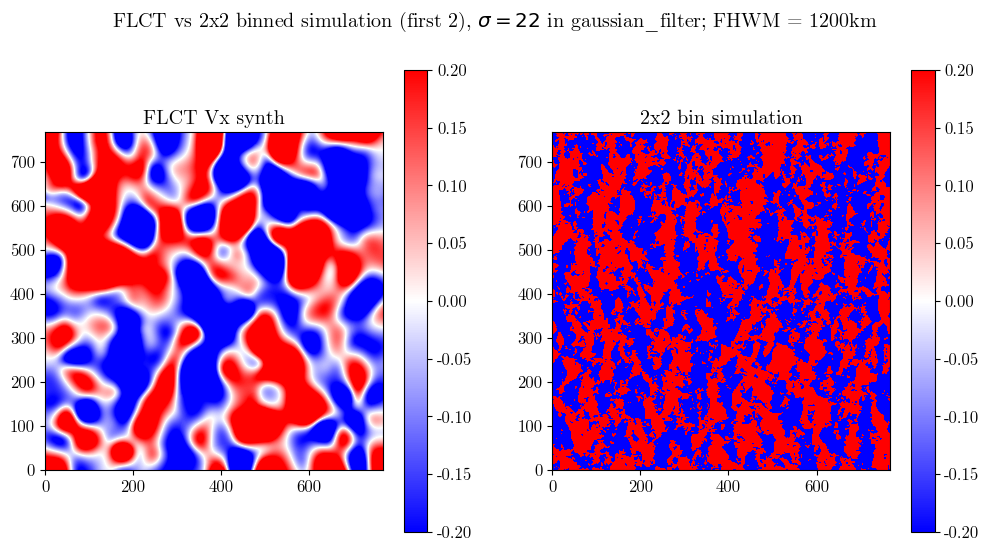

In [171]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 22$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation") 
fig.colorbar(im2)

In [172]:
Vxbin_filtered22 = gaussian_filter(Vx_bin, 22.5, mode = "wrap")
Vybin_filtered22 = gaussian_filter(Vy_bin, 22.5, mode = "wrap")

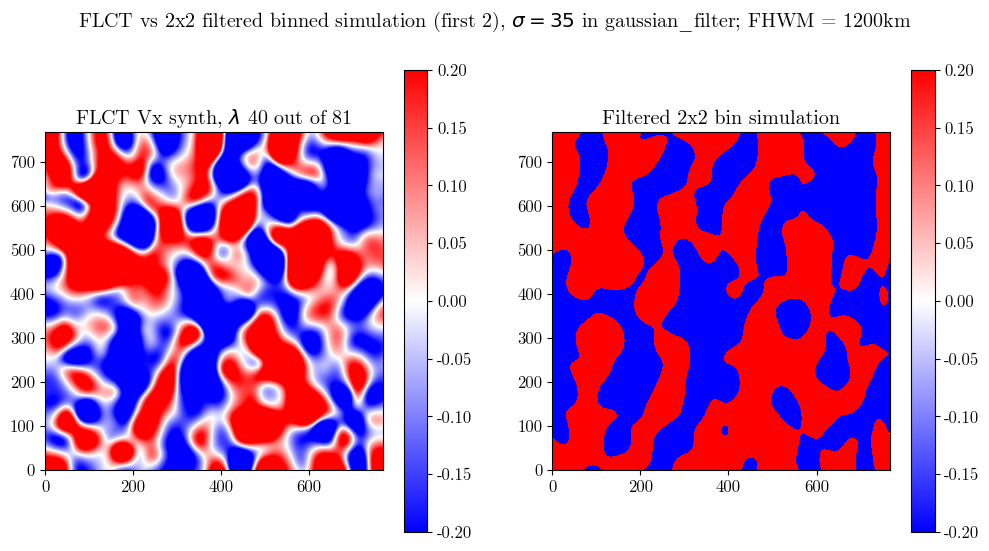

In [173]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 40 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxbin_filtered22[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
#plt.savefig("New40_TAU_0_1Vx.png", dpi = 600)

In [174]:
r_1 = pearsonr(vel_x40.flatten(), Vxbin_filtered22.flatten()) 
print(r_1)

PearsonRResult(statistic=0.6887001072793055, pvalue=0.0)


In [175]:
r_2 = pearsonr(vel_y40.flatten(), Vybin_filtered22.flatten()) 
print(r_2)

PearsonRResult(statistic=0.6159102356585227, pvalue=0.0)


In [176]:
cube45 = fits.open("0_lwsynth_525.0.fits")[0].data

In [177]:
cube46 = fits.open("150_lwsynth_525.0.fits")[0].data

In [178]:
image3 = cube45[:,:,0,40]
image4 = cube46[:,:,0,40]

In [179]:
vel_x40b, vel_y40b, vm40b = pyflct.flct(image3, image4, delta_t, pixelsize, sigma, quiet = True)

In [180]:
# 2x2 Binning of Velocities
Vx_1 = Vx[0]
Vx_2 = Vx[1]

Vy_1 = Vy[0]
Vy_2 = Vy[1]

Vx_1 = Vx_1.reshape(768, 2, 768, 2)
Vx_2 = Vx_2.reshape(768, 2, 768, 2)
Vy_1 = Vy_1.reshape(768, 2, 768, 2)
Vy_2 = Vy_2.reshape(768, 2, 768, 2)

In [181]:
Vx_bin = (Vx_1 + Vx_2).mean(axis = 3).mean(axis = 1)
Vy_bin = (Vy_1 + Vy_2).mean(axis = 3).mean(axis = 1)

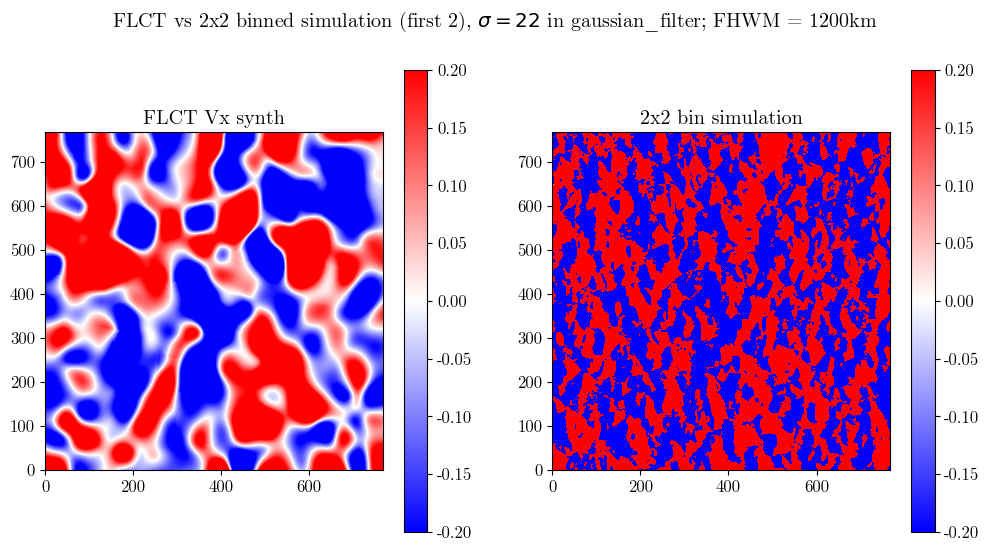

In [182]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 22$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40b[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation") 
fig.colorbar(im2)

In [183]:
Vxbin_filtered22 = gaussian_filter(Vx_bin, 22.5, mode = "wrap")
Vybin_filtered22 = gaussian_filter(Vy_bin, 22.5, mode = "wrap")

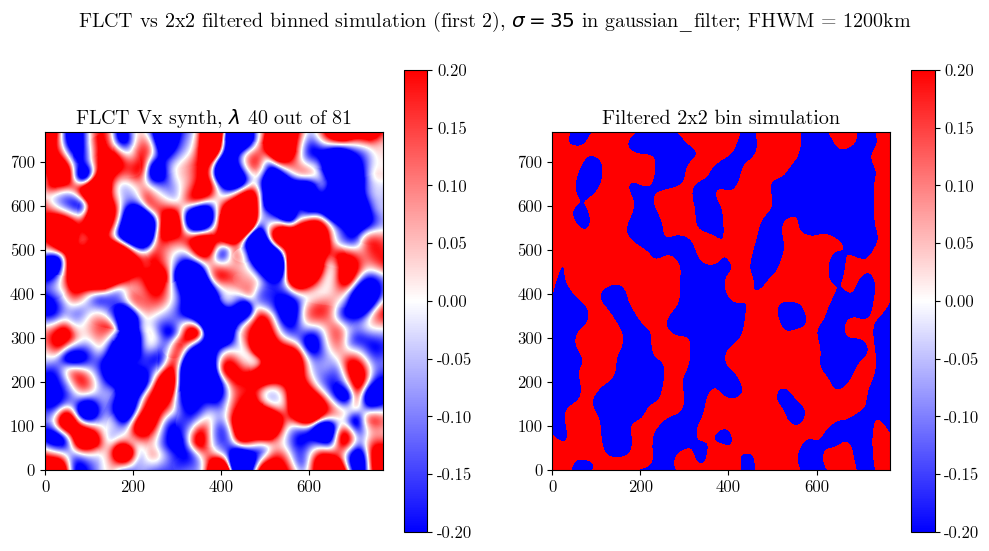

In [184]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40b[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 40 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxbin_filtered22[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
#plt.savefig("New40_TAU_0_1Vx.png", dpi = 600)

In [185]:
r_5 = pearsonr(vel_x40b.flatten(), Vxbin_filtered22.flatten()) 
print(r_5)

PearsonRResult(statistic=0.7028500298283689, pvalue=0.0)


In [186]:
r_6 = pearsonr(vel_y40b.flatten(), Vybin_filtered22.flatten()) 
print(r_6)

PearsonRResult(statistic=0.6710672377548299, pvalue=0.0)


In [195]:
np.shape(vel_x40b)

(768, 768)

In [196]:
np.shape(Vx_bin)

(768, 768)

In [197]:
r_7 = pearsonr(vel_x40b.flatten(), Vx_bin.flatten()) 
print(r_7)

PearsonRResult(statistic=0.35619013676138633, pvalue=0.0)


In [198]:
print(cube1[1,1,0,80])

2.918678881827666e-08
